# Travel Map

Data from gadm.org

In [16]:
import shapefile
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, rcParams, path, patches
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import LineCollection
%matplotlib inline

In [17]:
# Coordinates of Cities
 
BUD = [47.4925,   19.051389] # Budapest
EDI = [55.953056, -3.188889] # Edinburgh
SOF = [42.7,      23.333333] # Sofia
IST = [41.013611, 28.955]    # Istanbul
PRA = [50.083333, 14.416667] # Prague
BEL = [44.816667, 20.466667] # Belgrade
DRE = [51.033333, 13.733333] # Dresden
BER = [52.516667, 13.383333] # Berlin


# http://colorbrewer2.org/
colours = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3',
           '#ff7f00', '#ffff33', '#a65628', '#f781bf',
           '#e41a1c', '#377eb8', '#4daf4a', '#984ea3',
           '#ff7f00', '#ffff33', '#a65628', '#f781bf',
           '#e41a1c', '#377eb8', '#4daf4a', '#984ea3',
           '#ff7f00', '#ffff33', '#a65628', '#f781bf',]

In [18]:
def plot_country(country, colour, m, lc='none', lw=1):
    '''Adapted from http://www.geophysique.be/2013/02/12/matplotlib-basemap-tutorial-10-shapefiles-unleached-continued'''
    r = shapefile.Reader('data/TravelMap/'+country+'_adm/'+country+'_adm0')

    shapes = r.shapes()
    records = r.records()
 
    for record, shape in zip(records,shapes):
        lons,lats = zip(*shape.points)
        data = np.array(m(lons, lats)).T
 
        if len(shape.parts) == 1:
            segs = [data,]
        else:
            segs = []
            for i in range(1,len(shape.parts)):
                index = shape.parts[i-1]
                index2 = shape.parts[i]
                segs.append(data[index:index2])
            segs.append(data[index2:])
 
        lines = LineCollection(segs,antialiaseds=(1,))
        lines.set_facecolors(colour)
        lines.set_edgecolors(lc)
        lines.set_linewidth(lw)

        return lines

In [52]:
def plot_arrow(nax, start, end, bmap):
    nax.annotate('', m_e(end[1], end[0]), bmap(start[1], start[0]),
                arrowprops=dict(arrowstyle='Fancy',
                                alpha=.6,
                                patchA=None,
                                patchB=None,
                                shrinkA=10,
                                shrinkB=10,
                                fc="w", ec="k",
                                connectionstyle="arc3, rad=-0.3",
                                ))


In [53]:
def plot_city(bmap, city, cityname, nax, clr):
    bmap.plot(city[1], city[0], 'o', mfc=clr, ms=10, mew=2, latlon=True)
    nax.annotate(cityname, bmap(city[1]+.1, city[0]+.1), color='b', fontsize=20)

## Global Map

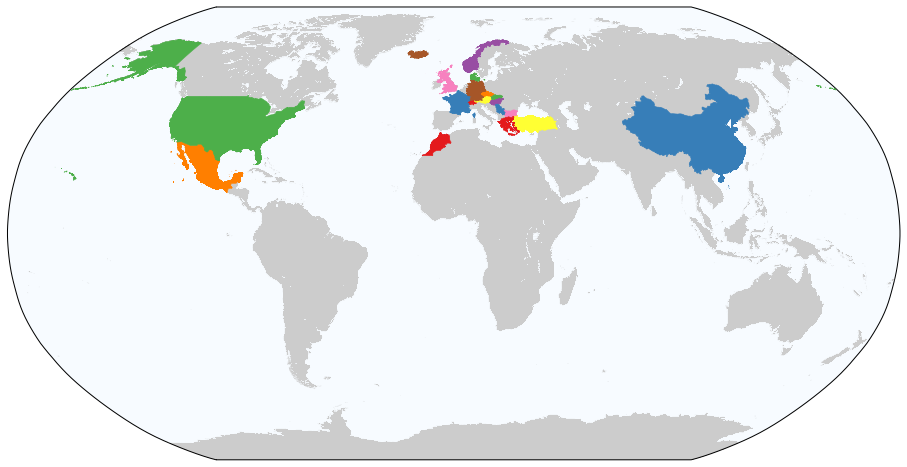

In [4]:
fig_g = plt.figure(1, figsize=(16, 12))
ax_g = plt.subplot(111)

# Create basemap
# resolution: c, l, i, h, f
m_g = Basemap(resolution='i', projection='robin', lon_0=0)

m_g.drawlsmask(land_color='.8', ocean_color='#f7fbff')

# Draw coast lines
m_g.drawcoastlines(color='.8', linewidth=.1)

# Draw all country borders
m_g.drawcountries(color='.8', linewidth=.1)

# http://gadm.org/
countries = ['CHE', 'CHN', 'DNK', 'HUN', 'CZE', 'TUR', 'ISL', 'BGR',
             'GRC', 'FRA', 'SVK', 'NOR', 'MEX', 'AUT', 'DEU', 'GBR',
             'MAR', 'SRB', 'USA',]

ii = 0
for i in countries:
    lines = plot_country(i, colours[ii], m_g)
    ii += 1
    ax_g.add_collection(lines)
    
    
# Save figure
#plt.figure(1)
#plt.savefig('/home/dtr/Desktop/Global.pdf')
#plt.savefig('/home/dtr/Desktop/Global.png')

plt.show()

## East Europe Trip

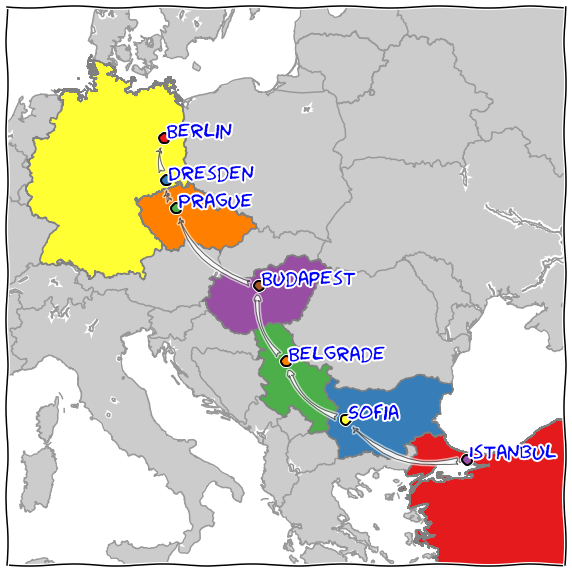

In [54]:
fig_e = plt.figure(figsize=(10, 10))
ax_e = plt.subplot(111)

# Create basemap
# resolution: c, l, i, h, f
m_e = Basemap(width=2200000, height=2200000, resolution='i', projection='tmerc', lat_0=BUD[0], lon_0=BEL[1])

# Draw coast lines
m_e.drawcoastlines(color='.6', linewidth=1.5)

# Draw all country borders
m_e.drawcountries(color='.6', linewidth=1.5)
m_e.fillcontinents(color='.8')

# http://gadm.org/
countries = ['TUR', 'BGR', 'SRB', 'HUN', 'CZE', 'DEU',]

ii = 0
for i in countries:
    lines = plot_country(i, colours[ii], m_e, '.5', 1.5)
    ii += 1
    ax_e.add_collection(lines)
    
plt.xkcd()

plot_city(m_e, IST, 'Istanbul', ax_e, colours[3])
plot_city(m_e, SOF, 'Sofia', ax_e, colours[5])
plot_city(m_e, BEL, 'Belgrade', ax_e, colours[4])
plot_city(m_e, BUD, 'Budapest', ax_e, colours[6])
plot_city(m_e, PRA, 'Prague', ax_e, colours[2])
plot_city(m_e, DRE, 'Dresden', ax_e, colours[1])
plot_city(m_e, BER, 'Berlin', ax_e, colours[0])


plot_arrow(ax_e, IST, SOF, m_e)
plot_arrow(ax_e, SOF, BEL, m_e)
plot_arrow(ax_e, BEL, BUD, m_e)
plot_arrow(ax_e, BUD, PRA, m_e)
plot_arrow(ax_e, PRA, DRE, m_e)
plot_arrow(ax_e, DRE, BER, m_e)

plt.savefig('/home/dtr/Desktop/test.png')
    
plt.show()

## Scotland